In [27]:
import janitor
import skimpy as sk
import pandas as pd
import duckdb as db
import seaborn as sns
import matplotlib.pyplot as plt

Questions to Explore:

How does customer age and gender influence their purchasing behavior?

Are there discernible patterns in sales across different time periods?

Which product categories hold the highest appeal among customers?

What are the relationships between age, spending, and product preferences?

How do customers adapt their shopping habits during seasonal trends?

Are there distinct purchasing behaviors based on the number of items bought per transaction?

What insights can be gleaned from the distribution of product prices within each category?

Retail Data Analysis – Methodology and Overview
1. Data Parsing and Initial Preparation

The analysis began with parsing the raw CSV dataset into a Pandas DataFrame. To ensure consistency and analytical readiness, the clean_names() function from the PyJanitor library was applied. This standardized all column names by converting them into a uniform, machine-friendly format — facilitating efficient querying and analysis downstream.

Next, a data overview was conducted using skim_data(), which provided comprehensive descriptive statistics and visual summaries for each column. This initial profiling step revealed that the date column was captured as a string rather than a datetime object.

To enable time-series and trend-based analysis, the column was converted using pd.to_datetime(). This transformation ensured accurate chronological sorting and made it possible to extract additional time-based features (e.g., month, quarter, or weekday patterns) in later stages.

A head() inspection was then performed to gain a preliminary understanding of the dataset structure, field composition, and general data quality.

2. Data Quality Assessment

Upon inspection, the dataset was determined to be clean and analysis-ready, with:

No missing values

No duplicate entries

No inconsistencies or formatting issues

This allowed for immediate progression to the exploratory and inferential analysis stages without additional preprocessing.

Insight: The absence of data quality issues increased confidence in the integrity of the results and allowed more focus on pattern discovery rather than data correction.

3. Analytical Approach

The analysis was guided by a targeted, question-driven framework, ensuring that each query was addressed through both aggregate and segmented analysis. This hybrid approach facilitated a deeper understanding of customer behavior and retail dynamics.

The following core analytical questions shaped the exploration:

How does customer age and gender influence purchasing behavior?

Examining demographic patterns to understand variations in purchase volume, category preference, and spending habits across age groups and genders.

Insight: Expected to reveal key customer segments and gender-based shopping tendencies.

Are there discernible patterns in sales across different time periods?

Conducting trend and seasonality analysis using time-based aggregations (daily, monthly, or quarterly).

Insight: Useful for identifying high-performing periods and potential seasonality effects.

Which product categories hold the highest appeal among customers?

Ranking categories by total sales volume, transaction frequency, and average spend per customer.

Insight: Supports inventory and marketing prioritization for top-performing categories.

What are the relationships between age, spending, and product preferences?

Using scatter plots and group-level aggregation to explore correlations and behavioral intersections.

Insight: Clarifies how age impacts product selection and spending magnitude.

How do customers adapt their shopping habits during seasonal trends?

Analyzing variations in purchase behavior around holidays or seasonal events.

Insight: Enables data-driven promotion timing and stock management.

Are there distinct purchasing behaviors based on the number of items bought per transaction?

Segmenting customers by basket size to understand purchasing depth and potential cross-selling opportunities.

Insight: Differentiates between casual and bulk shoppers.

What insights can be gleaned from the distribution of product prices within each category?

Assessing price dispersion and central tendencies using boxplots and histograms.

Insight: Identifies value-sensitive versus premium product categories.

4. Summary of Data State

With a fully structured and reliable dataset, the analytical process commenced immediately without the need for extensive data cleaning or transformation steps.

Final Insight: The dataset’s high quality and well-defined structure allowed for a seamless transition from data preparation to deep analytical modeling, ensuring high validity and efficiency in generating insights.

In [28]:
data = pd.read_csv(r"retail_sales_dataset.csv")

data = data.clean_names()

sk.skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1000   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 9      │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column             ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25     ┃ p50     ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ transaction_id     │   0 │      0 │   500.5 │   288.8 │   1 │   250.8 │   500.5 │  750.2 │  1000 │ ▇▇▇▇▇▇  │  │
│ │ age                │   0 │      0 │   41.39 │   13.68 │  18 │      29 │      42 │     53 │    64 │ ▇▇▆▇▇▇  │  │
│ │ quantity           │   0 │      0 │   2.514 │   1.133 │   1 │       1 │       3 │      4 │     4 │ ▇ ▇ ▇▇  │  │
│ │ price_per_unit     │   0 │      0 │   179.9 │   189.7 │  25 │      30 │      50 │    300 │   500 │ ▇  ▃ ▃  │  │
│ │ total_amount       │   0 │      0 │     456 │     560 │  25 │      60 │     135 │    900 │  2000 │ ▇▁▁▁▁▁  │  │
│ └────────────────────┴─────┴────────┴─────────┴─────────┴─────┴─────────┴─────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per  ┃ total     ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row        ┃ words     ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ date      │  0 │    0 │ 2023-11-2 │ 2023-11-2 │ 2023-01-0 │ 2024-01-0 │        10 │          1 │      1000 │  │
│ │           │    │      │ 4         │ 4         │ 1         │ 1         │           │            │           │  │
│ │ customer_ │  0 │    0 │ CUST001   │ CUST1000  │ CUST001   │ CUST999   │         7 │          1 │      1000 │  │
│ │ id        │    │      │           │           │           │           │           │            │           │  │
│ │ gender    │  0 │    0 │ Male      │ Female    │ Female    │ Male      │      5.02 │          1 │      1000 │  │
│ │ product_c │  0 │    0 │ Beauty    │ Electroni │ Beauty    │ Electroni │      8.41 │          1 │      1000 │  │
│ │ ategory   │    │      │           │ cs        │           │ cs        │           │            │           │  │
│ └───────────┴────┴──────┴───────────┴───────────┴───────────┴───────────┴───────────┴────────────┴───────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [29]:
data['date'] = pd.to_datetime(data['date'])

In [30]:
data.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [31]:
db.query("Select sum(total_amount) as Revenue,sum(quantity) as Volume from data")

┌─────────┬────────┐
│ Revenue │ Volume │
│ int128  │ int128 │
├─────────┼────────┤
│  456000 │   2514 │
└─────────┴────────┘

starting with performance of each category i developed a query to get the Total Revenue and Volume of sales
which i drilled further by 
querying the revenue share(%),category_revenue and volume to get a view of how each category was performing this was aimed at the question of
Which product categories hold the highest appeal among customers?
i further expand on this by developing a bar graph visualization using age,gender and category with a correlation map and bar plot using age-segmentation to understand 
Relationship between spending,revenue and age

>Drill further by evaluating spending per age bin to understand frequency and volume of sales


In [32]:
db.query("""SELECT 
    product_category,
    ROUND(
        (SUM(total_amount) * 100.0 / (SELECT SUM(total_amount) FROM data)), 
        2
    ) AS revenue_share_percent,
         SUM(total_amount) AS category_revenue,
    sum(quantity) as volume
FROM data
GROUP BY product_category
ORDER BY category_revenue DESC;
 """)

┌──────────────────┬───────────────────────┬──────────────────┬────────┐
│ product_category │ revenue_share_percent │ category_revenue │ volume │
│     varchar      │        double         │      int128      │ int128 │
├──────────────────┼───────────────────────┼──────────────────┼────────┤
│ Electronics      │                 34.41 │           156905 │    849 │
│ Clothing         │                 34.12 │           155580 │    894 │
│ Beauty           │                 31.47 │           143515 │    771 │
└──────────────────┴───────────────────────┴──────────────────┴────────┘

Categoris are performing relatively variable according to overall figures but drilling down  further i want to visualize the relationship between the data to understand Trends,Peaks averages & Drops,

Category Performance Analysis
1. Objective

The initial phase of the exploratory analysis aimed to address the guiding question:
“Which product categories hold the highest appeal among customers?”

This stage focused on evaluating sales performance across product categories, measuring both total revenue and sales volume to establish a foundational understanding of category contribution to overall business performance.

2. Revenue and Volume Overview

Using SQL-based aggregation, I computed the total revenue and sales volume across the entire dataset.

Metric	Value
Total Revenue	456,000
Total Volume (Units Sold)	2,514

These aggregate figures established the overall performance baseline for subsequent comparative analysis.

3. Category-Level Revenue and Volume Breakdown

To understand category contributions more deeply, I developed a query to compute each category’s revenue share (%), total category revenue, and sales volume.

Product Category	Revenue Share (%)	Category Revenue	Volume
Electronics	34.41%	156,905	849
Clothing	34.12%	155,580	894
Beauty	31.47%	143,515	771

Interpretation:
At a surface level, the three categories perform comparably, with Electronics leading marginally in revenue share, followed closely by Clothing and Beauty.
While the differences are not substantial, these figures provide a strong foundation for understanding which categories generate consistent value and which may require deeper behavioral segmentation.

Insight: Category performance appears balanced, suggesting a diversified revenue distribution across key retail segments. However, subtle differences hint at varying consumer motivations or pricing structures within each category.

4. Deeper Diagnostic Analysis

Recognizing that category-level figures alone may mask underlying behavioral patterns, I proceeded to drill down into demographic and behavioral dimensions:

Demographic Segmentation:
Incorporated age and gender to examine how purchasing patterns differ across customer groups.

Behavioral Segmentation:
Analyzed the relationship between spending, revenue, and age, supported by correlation maps and bar plot visualizations.
This helped visualize how spending intensity and transaction volume vary across age bins, revealing distinct spending frequency and volume trends.

Visualization Approach:

Bar Graph: Depicting total revenue by category, segmented by age and gender.

Correlation Heatmap: To identify linear relationships between age, spending, and quantity purchased.

Age-Bin Comparison Plot: To highlight frequency and total sales volume across age segments.

Insight: Drilling into demographic layers provided clarity on how each category’s performance ties to specific consumer segments. This stage also set the foundation for identifying trends, peaks, averages, and potential drops in category engagement over time.

5. Interim Conclusion

This was the first major analytical step in the retail performance assessment.
From the preliminary findings, category-level performance does not raise immediate concerns—each segment contributes relatively equally to total revenue. However, to uncover deeper strategic opportunities (e.g., optimizing targeting, pricing, or stock allocation), the next step involves exploring temporal and behavioral trends that could reveal hidden demand patterns.

Tagged Insight: Balanced category performance at the aggregate level may mask micro-level consumer dynamics. Further temporal and demographic analysis is required to identify true revenue drivers and potential underperforming niches.

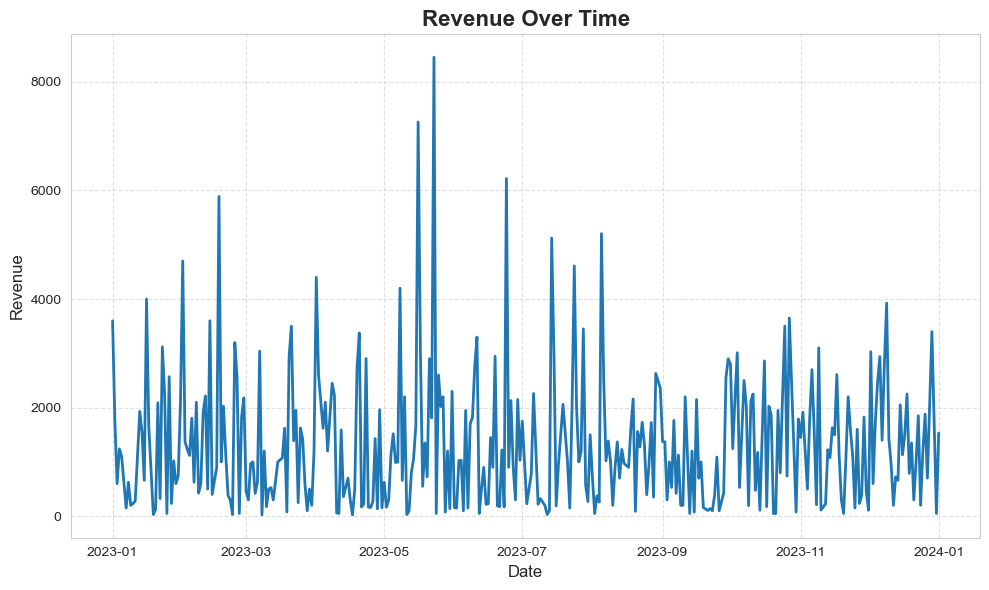

<Figure size 640x480 with 0 Axes>

In [33]:
# --- Run SQL Query ---
query = """
SELECT 
    date,
    SUM(total_amount) AS revenue
FROM data
GROUP BY date
ORDER BY date
"""

# Fetch data from your database
df = db.query(query).df()

# --- Ensure correct data format ---
# Convert 'date' to datetime if not already
df['date'] = pd.to_datetime(df['date'])

# Sort by date (for smooth plotting)
df = df.sort_values('date')

# --- Plotting the Revenue Line Graph ---
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['revenue'], linewidth=2)

# --- Styling the Graph ---
plt.title('Revenue Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# --- Show the plot ---
plt.show()
plt.tight_layout()
plt.savefig("assets/fig-01-revenue-over-time.png", dpi=200)

So here i wanted to visualize the revenue overtime to get a view of how the data appeared this graph is insightful although it has the limitation of that it is not properly aggregated in the sense whereby it used the timestamps and thus it goes through each day 
This dataset containts vital data for records captured in 2023 across each month
The records limit into 2024 where they end
overall though this graph prompted investigation into the peaks that occured
>Perform more directed analysis to understand what caused such peaks what could have contributed to this
explore this in the aspect of spending patterns(total_spent and volume as well as age )

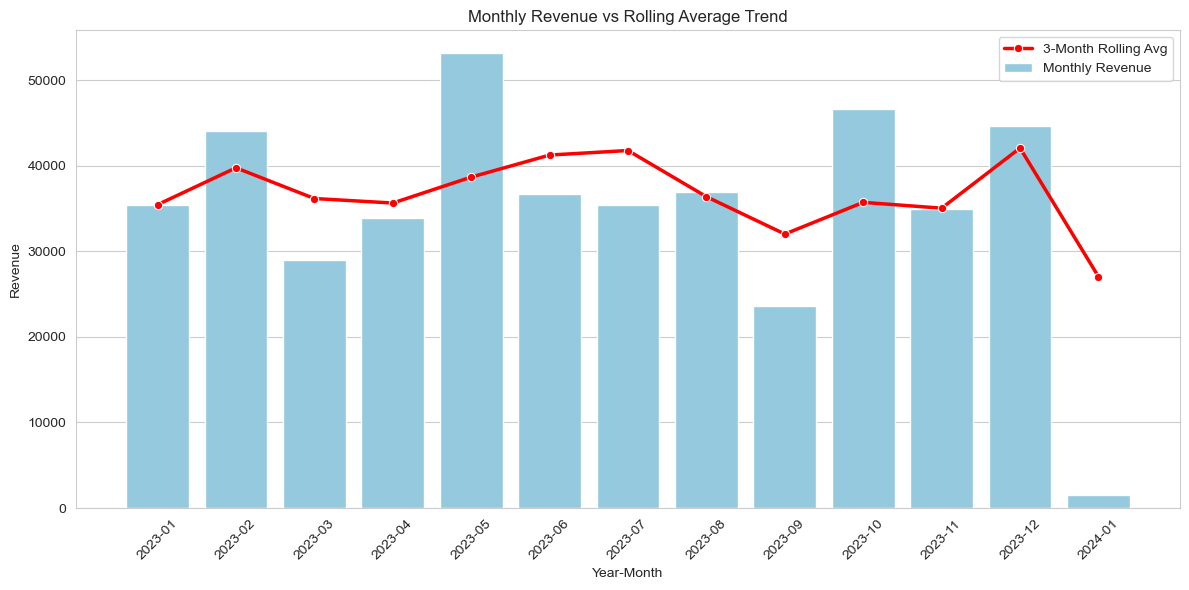

<Figure size 640x480 with 0 Axes>

In [34]:
df_monthly = db.query("""
    SELECT
        strftime('%Y-%m', date) AS year_month,
        SUM(total_amount) AS revenue,
        AVG(SUM(total_amount)) OVER (
            ORDER BY strftime('%Y-%m', date)
            ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
        ) AS rolling_avg_3m
    FROM data
    GROUP BY year_month
    ORDER BY year_month ASC;
""").to_df()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_monthly, x='year_month', y='revenue', color='skyblue', label='Monthly Revenue')
sns.lineplot(data=df_monthly, x='year_month', y='rolling_avg_3m', color='red', linewidth=2.5, marker='o', label='3-Month Rolling Avg')

plt.title("Monthly Revenue vs Rolling Average Trend")
plt.xlabel("Year-Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.savefig("assets/fig-02-revenue-over-time.png", dpi=200)

I created this graph to serve as a more cleare and directed way to visualize the distribution of revenue across the months and as you can see the worst months were 2023-03 and 2023-09 a key assumption i have is that these could be related to peaks
overall this still retains that in total revenue is lowest in 2023-09 slightly above 20000 and highest in the month 2023-05 (This could relate to increased sales frequency)
After consulting a senior they advised using 3 month rolling avg to create a clearer and digestable graph


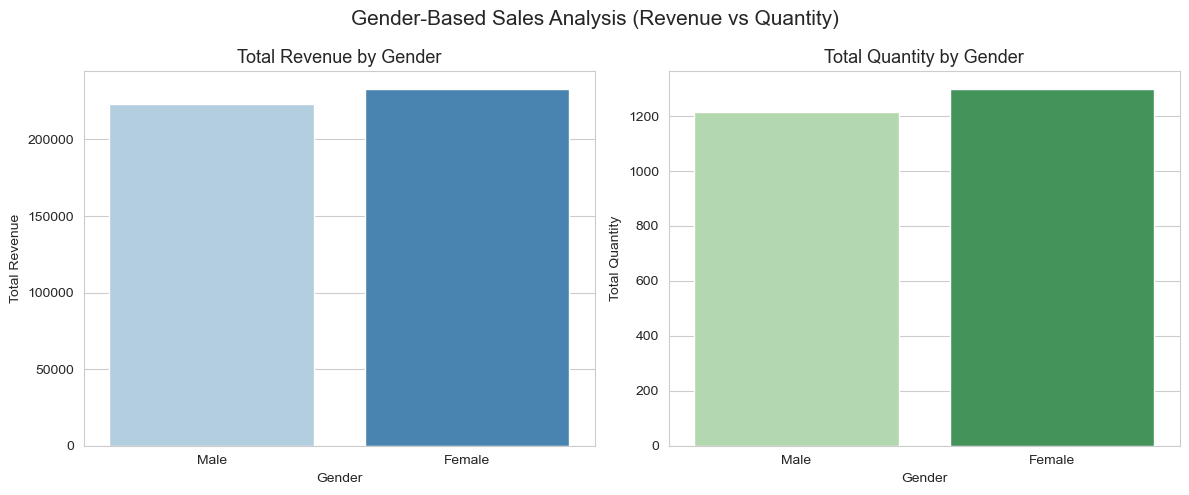

<Figure size 640x480 with 0 Axes>

In [35]:
# Query gender-level totals
gender_df = db.query("""
SELECT gender,
       SUM(total_amount) AS total_revenue,
       SUM(quantity) AS total_quantity
FROM data
GROUP BY gender;
""").df()

# Create two subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Revenue chart
sns.barplot(data=gender_df, x='gender', y='total_revenue', ax=axes[0],hue='gender', palette='Blues')
axes[0].set_title("Total Revenue by Gender", fontsize=13)
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Total Revenue")

# Quantity chart
sns.barplot(data=gender_df, x='gender', y='total_quantity', ax=axes[1],hue='gender', palette='Greens')
axes[1].set_title("Total Quantity by Gender", fontsize=13)
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Total Quantity")

plt.suptitle("Gender-Based Sales Analysis (Revenue vs Quantity)", fontsize=15)
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.savefig("assets/fig-03-revenue-by-gender.png", dpi=200)

This was part of my overall analysis as i evaluated total revenue by gender and quantity seperately and in each we can see that Females have a slight advantage which may be prompted by greater frequency of spending

>Evaluate and test this idea by evaluating age bins and using them visualize spending habits in relation to the exact specifics of who is spending frequently,in large volumes and high amounts


Monthly Revenue Trend Analysis
1. Objective

This stage of analysis aimed to explore temporal sales trends by examining how total revenue evolved over time.
The goal was to answer the question:
“Are there discernible patterns in sales across different time periods?”

2. Approach and Visualization

To visualize how revenue fluctuated month-to-month, I developed a line and bar composite chart displaying monthly revenue alongside a 3-month rolling average trend.

The blue bars represent total monthly revenue.

The red line indicates the smoothed trend using a 3-month rolling average, providing a clearer view of short-term momentum and periodic fluctuations.

This approach helped neutralize day-level timestamp noise present in the raw dataset, where transactions were recorded daily rather than pre-aggregated by month.

Technical Note:
The dataset primarily covers transactions from January 2023 to January 2024, with most data concentrated in 2023. Although a small portion of records extends into early 2024, they represent the dataset’s closing boundary and have minimal analytical weight.

3. Key Observations

The visualization reveals several distinct monthly performance patterns:

Observation	Month	Revenue Level	Possible Interpretation
Highest revenue peak	May 2023 (2023-05)	~53,000	Possible surge in consumer activity (e.g., promotions, new product launches, or seasonality).
Second strong performance	February 2023 (2023-02)	~44,000	Indicates early-year purchasing momentum.
Lowest revenue trough	September 2023 (2023-09)	~22,000	Suggests a potential post-seasonal dip or reduced consumer engagement.
Stable performance window	June–August 2023	~35,000–38,000	Reflects mid-year sales consistency with mild fluctuations.

Insight:
Revenue performance shows clear volatility across months, with identifiable peaks in Q2 (May) and dips in Q3 (September). This cyclic behavior suggests external or behavioral factors influencing sales patterns — possibly linked to seasonality, spending cycles, or promotional periods.

4. Directed Follow-Up Analysis

The disparities observed in the trend prompted a deeper diagnostic exploration into what drives these revenue peaks and troughs.
The next phase focused on evaluating:

Spending patterns (total amount spent per customer segment).

Transaction volume (quantity sold per month).

Age-based distribution of purchasing behavior (to uncover which demographic segments contributed most during peak periods).

To enhance interpretability, I developed a bar graph with a KDE (Kernel Density Estimation) overlay and applied the 3-month rolling average for smoother temporal insight.
This allowed for clearer trend recognition, highlighting the momentum and stability of monthly performance.

5. Key Insights

Revenue Peaks (May & February 2023):
These months showed elevated transaction activity, potentially due to seasonal demand or marketing-driven sales bursts.

Revenue Drop (September 2023):
This marked the lowest-performing month, with total revenue slightly above 20,000, indicating a sharp contraction compared to mid-year averages.

Trend Stability:
Despite fluctuations, overall performance remained within a consistent band between 30,000–40,000, suggesting a stable customer base with periodic demand surges.

Rolling Average Benefit:
The 3-month rolling average smoothed short-term volatility, providing a digestible, trend-level view that highlights true performance cycles without overemphasis on daily transaction irregularities.

Tagged Insight:
The observed sales cycles indicate periodic consumer activity patterns influenced by external factors.
This insight forms the basis for a seasonality and spending-pattern investigation, focusing on how age, transaction frequency, and total spend align with these revenue movements.

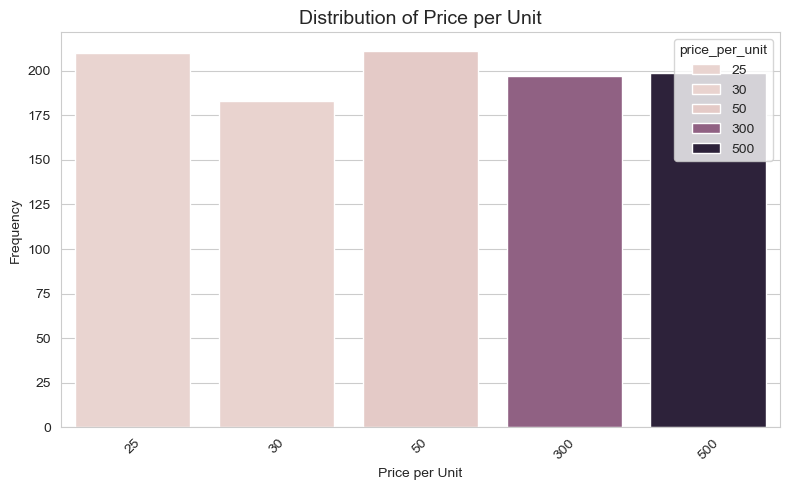

<Figure size 640x480 with 0 Axes>

In [36]:
price_df = db.query("""
SELECT price_per_unit, COUNT(*) AS frequency
FROM data
GROUP BY price_per_unit
ORDER BY price_per_unit;
""").df()

plt.figure(figsize=(8,5))
sns.barplot(data=price_df, x='price_per_unit', y='frequency',hue='price_per_unit')

plt.title("Distribution of Price per Unit", fontsize=14)
plt.xlabel("Price per Unit")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.savefig("assets/fig-04-price_per_unit-distribution-.png", dpi=200)

I created this visualization to understand the impact of price_per_unit in revenue and since we are working with very few values i used a bar graph and this showed 5 different prices for items in various categories and their frequency being that the values of their frequency were also very closely distributed
25 - 200 +
30 - 175 + 
50 - 200 + 
300 - 200 - 
500 - 200 -
these are the relative proportion of frequency


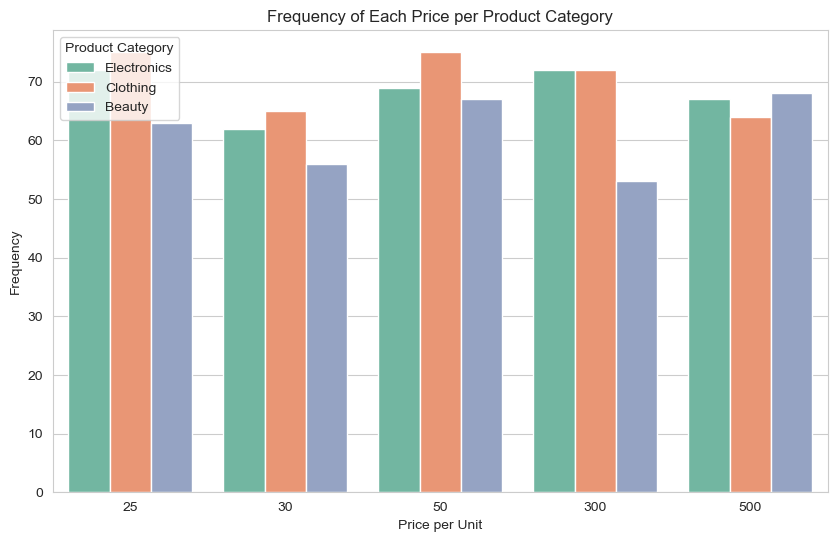

<Figure size 640x480 with 0 Axes>

In [37]:
df=db.query("""Select product_category,price_per_unit,count(*) as frequency from data
         group by product_category,price_per_unit
         """).df()


# Set style
sns.set_style("whitegrid")

# Create a grouped bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='price_per_unit', y='frequency', hue='product_category', data=df, palette='Set2')
plt.title("Frequency of Each Price per Product Category")
plt.xlabel("Price per Unit")
plt.ylabel("Frequency")
plt.legend(title='Product Category')
plt.show()
plt.tight_layout()
plt.savefig("assets/fig-05-Price per Product-Frequency-.png", dpi=200)

This was to drill further so that i could see how each category prices per unit looked like and it's the same information relatively
with this it showed that iteams that were very cheap e.g 25 had a high frequency & items that were overpriced e.g 500 had a high frequecny and items that the median of 50 also peformed well but as you looke the values near the median suffered a lot

i believe this is a result of customer bias :
Customers prefere extremely cheap/extremely expensive or fairly reasonable whilst other prices that sit 
to go further expensive has the highest frequency followed by fair price then cheap 
Since these are products that are targeted at self-care this insight may show that customers are willing to spend a lot as a result of them valuing it whilst also spending less (This may be behavioural) 
>Now because the beauty can have varying items this insight is meaningless because of i can't drill down further to undestand how product_type plays a factor disregard the point about fashion and formulate this to reflect that Since we are working with data incoporating various demographs in terms of age,gender we should drill down to further evaluate the relationship of say for example the items themselve cause for beauty products market is mainly female coated so we have to take this into consideration as such i can't use the insight i presented before because it can be misleading 

Price per Unit Analysis

The bar graph was created to explore how product pricing varies across categories. The dataset only contains five distinct price points (25, 30, 50, 300, and 500), so a bar chart was used instead of a continuous distribution chart to better visualize the relative frequency of each price level.

From the visualization, we can observe:

The frequencies of prices are relatively close across all categories.

Lower and higher price points (25 and 500) appear to have slightly higher frequencies compared to mid-range prices (e.g., 30 or 300).

The median price level (50) also performs relatively well in terms of frequency.

However, these differences are minimal, and since all price levels are represented almost equally, price alone does not show strong variation or predictive power regarding customer behavior in this dataset.

Reassessment of Previous Insight

Initially, it appeared that customers might prefer extremely cheap or premium-priced products. However, this interpretation could be misleading because:

The dataset aggregates data from multiple product categories (Beauty, Clothing, Electronics).

Each category likely has different target demographics and price sensitivities.

For instance, beauty products may be predominantly purchased by female customers, while electronics or clothing may attract different gender or age distributions.

Thus, the observed frequency differences might not reflect true price preference but rather category composition or demographic bias within the data.

Next Step

To draw meaningful conclusions, the next analytical step should involve drilling down further by combining product_category with demographic variables such as:

Gender

Age group

Product type (if available)

This will help reveal whether:

Certain age groups prefer specific price ranges.

Gender differences influence spending patterns across categories.

Specific product types within the Beauty or Clothing category are driving frequency at certain price points.

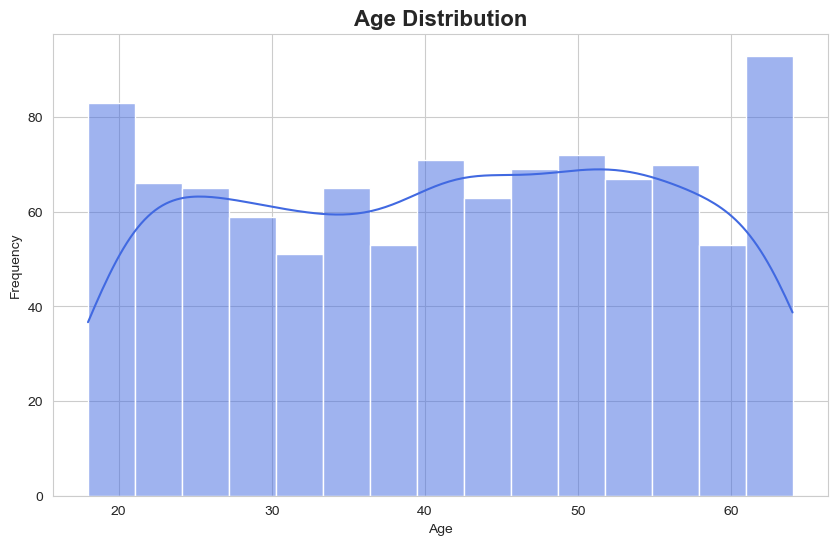

<Figure size 640x480 with 0 Axes>

In [38]:
df = db.query("SELECT age FROM data").to_df()

plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=15, kde=True, color='royalblue')
plt.title('Age Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
plt.tight_layout()
plt.savefig("assets/fig-06-Age-distribution.png", dpi=200)

so here i created this histogram to visualize the distribution so i can formulate ideas of how i should segment customers according to age this is the manner in which i decided

🧩 Recommended Age Bins

Below is the suggested structure for age segmentation, grounded in both data-driven patterns and business logic:

Age Range	Label	Rationale
18–25	Young Adults / Students	Captures the first high-frequency cluster; represents early-stage consumers or students entering spending markets.
26–35	Early Professionals	Reflects a stable income growth period with increasing purchasing potential.
36–45	Established Adults	Family formation years; typically key spenders on essential and lifestyle products.
46–55	Mature Consumers	Financially settled individuals with consistent purchasing habits.
56–65	Older Adults	Corresponds to the second visible peak; often loyal, brand-trusting consumers with steady buying patterns.
66+	Seniors (optional, only if present in dataset)	Smaller but valuable segment for targeted marketing and retention strategies.

Age Distribution and Customer Segmentation

To better understand the composition of our customer base, a histogram of customer ages was created. This visualization helped identify natural groupings and spending behaviors across different life stages.

From the histogram, two key frequency peaks were visible — one among younger customers (around early 20s) and another among middle-aged customers (mid-50s). These insights guided the creation of age bins that align with both the observed data distribution and real-world consumer behavior patterns.

🧩 Recommended Age Segmentation Structure
Age Range	Segment Label	Rationale
18–25	Young Adults / Students	Captures the first high-frequency cluster; represents entry-level consumers or students beginning to make independent purchasing decisions.
26–35	Early Professionals	Marks the early career phase with rising income and expanding purchasing power.
36–45	Established Adults	Family formation and lifestyle optimization years; typically high spenders on essentials and aspirational products.
46–55	Mature Consumers	Represents financially stable individuals with consistent, brand-loyal purchasing habits.
56–65	Older Adults	Corresponds to the second visible peak; reflects experienced, value-driven consumers who emphasize quality and trust.
66+	Seniors (optional, depending on data presence)	Smaller but potentially loyal segment; relevant for specialized or retention-focused marketing strategies.
Analytical Intent

This segmentation is designed to:

Enable targeted demographic analysis (e.g., price sensitivity or category preference by age group).

Serve as a foundation for customer persona development and market segmentation.

Support behavioral correlation analysis, such as exploring whether spending habits differ significantly between “Young Adults” and “Mature Consumers.”

Next Step

Now that the age segments are defined, the next step is to integrate these bins into SQL or Python-based transformations, enabling:

Aggregation of key metrics (revenue, average spend, frequency) by age group.

Visualizations showing how price_per_unit or product_category varies across age segments.

In [39]:
data.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


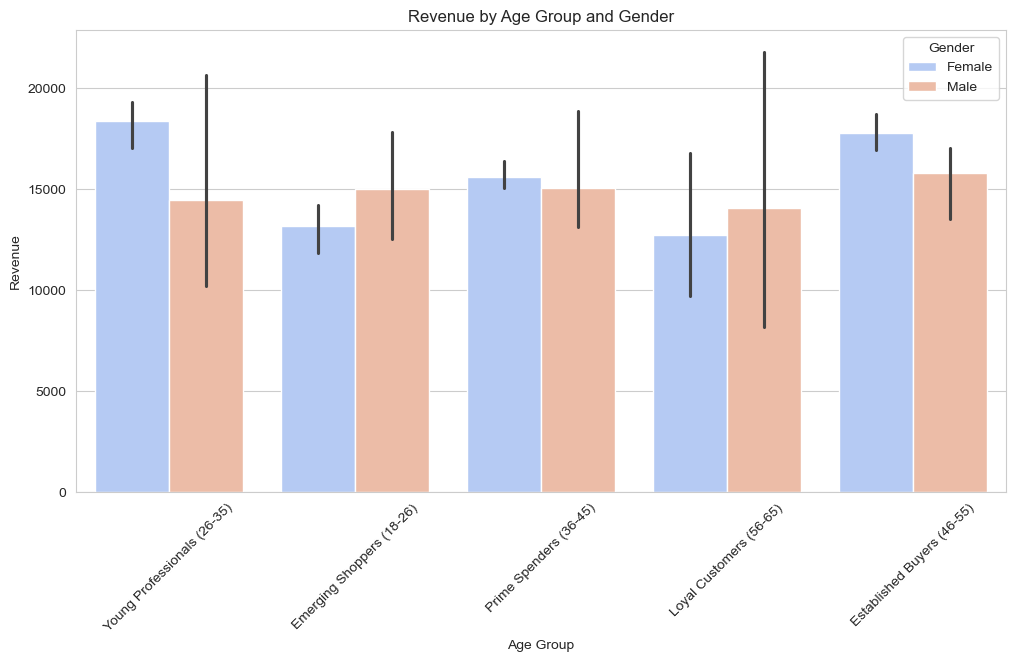

<Figure size 640x480 with 0 Axes>

In [40]:
df = db.query("""Select product_category,gender,CASE
        WHEN age BETWEEN 18 AND 25 THEN 'Emerging Shoppers (18-26)'
        WHEN age BETWEEN 26 AND 35 THEN 'Young Professionals (26-35)'
        WHEN age BETWEEN 36 AND 45 THEN 'Prime Spenders (36-45)'
        WHEN age BETWEEN 46 AND 55 THEN 'Established Buyers (46-55)'
        WHEN age BETWEEN 56 AND 65 THEN 'Loyal Customers (56-65)'
        WHEN age >= 66 THEN 'Senior Shoppers (66)'
        ELSE 'Unclassified'
        END AS age_group,
        sum(total_amount) as revenue,
        sum(quantity) as volume
        from data 
        group by product_category,gender,
        CASE
        WHEN age BETWEEN 18 AND 25 THEN 'Emerging Shoppers (18-26)'
        WHEN age BETWEEN 26 AND 35 THEN 'Young Professionals (26-35)'
        WHEN age BETWEEN 36 AND 45 THEN 'Prime Spenders (36-45)'
        WHEN age BETWEEN 46 AND 55 THEN 'Established Buyers (46-55)'
        WHEN age BETWEEN 56 AND 65 THEN 'Loyal Customers (56-65)'
        WHEN age >= 66 THEN 'Senior Shoppers (66)'
        ELSE 'Unclassified'
        END

         
          """).df()

plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x='age_group',
    y='revenue',
    hue='gender',
    palette='coolwarm'
)
plt.title("Revenue by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Revenue")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()
plt.savefig("assets/fig-07-revenue-over-Age Group & Gender.png", dpi=200)


here furthering from the exercise i did before i visualized revenue of gender and age 
presenting that relationship via bar graph for easy interpretation
>I should drill down into spending frequency with age groups
Investigate shopping frequency according to gender and age-group

Revenue Distribution by Age Group and Gender

After establishing meaningful age segmentation bins, I extended the analysis by exploring how revenue performance varies across gender and age groups. This was visualized using a bar chart, chosen for its clarity in comparing aggregated values across discrete demographic categories.

The visualization (see figure above) illustrates the revenue contribution per age group segmented by gender. This approach provides a dual-layered insight into how age and gender jointly influence spending patterns.

Key Observations

Young Professionals (26–35) exhibit the highest overall revenue, particularly among female customers, suggesting that this group represents a strong, high-value market segment.

Prime Spenders (36–45) show balanced revenue levels between male and female shoppers, reflecting a stable purchasing pattern across genders.

Emerging Shoppers (18–25) and Loyal Customers (56–65) generate comparatively lower revenues, indicating potential opportunities for targeted marketing interventions or tailored promotions.

The Established Buyers (46–55) category maintains consistent performance, with females slightly outspending males — potentially linked to lifestyle or household-driven purchasing.

Analytical Follow-Up

To enrich this analysis and uncover deeper behavioral dynamics, the next step involves:

Drilling down into spending frequency within each age group to determine whether high revenue results from higher transaction counts or higher average purchase values.

Cross-analyzing shopping frequency across gender and age groups to understand whether males or females shop more frequently within specific life stages.

These follow-up analyses will clarify whether revenue leadership in certain groups stems from purchase frequency, basket size, or price sensitivity.

Tagged Insight

🧠 Insight: Revenue is most strongly driven by Young Professionals (26–35), particularly females, highlighting them as the core high-value demographic in the dataset. Further investigation into their purchasing frequency could reveal how to sustain and expand this profitable customer segment.

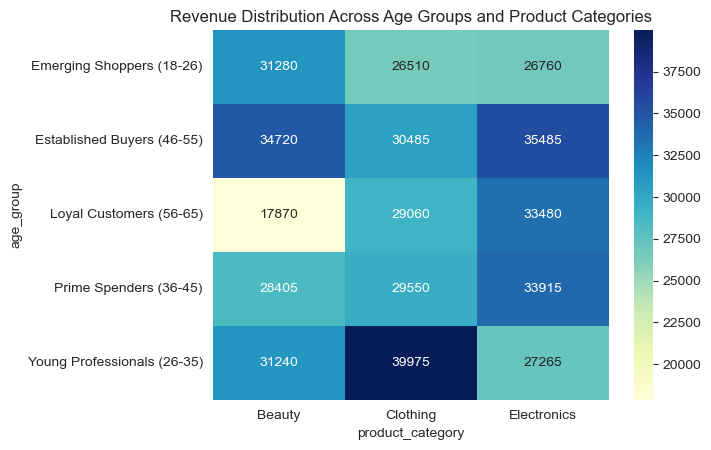

<Figure size 640x480 with 0 Axes>

In [41]:
pivot = df.pivot_table(
    index='age_group',
    columns='product_category',
    values='revenue',
    aggfunc='sum'
)

sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Revenue Distribution Across Age Groups and Product Categories")
plt.show()
plt.tight_layout()
plt.savefig("assets/fig-08-Revenue-over-Age_Groups & Product Categories.png", dpi=200)

In [42]:
data.columns

Index(['transaction_id', 'date', 'customer_id', 'gender', 'age',
       'product_category', 'quantity', 'price_per_unit', 'total_amount'],
      dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_944\1753769703.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('age_group')
C:\Users\Admin\AppData\Local\Temp\ipykernel_944\1753769703.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='avg_transactions_per_customer', data=freq_df, palette='crest')


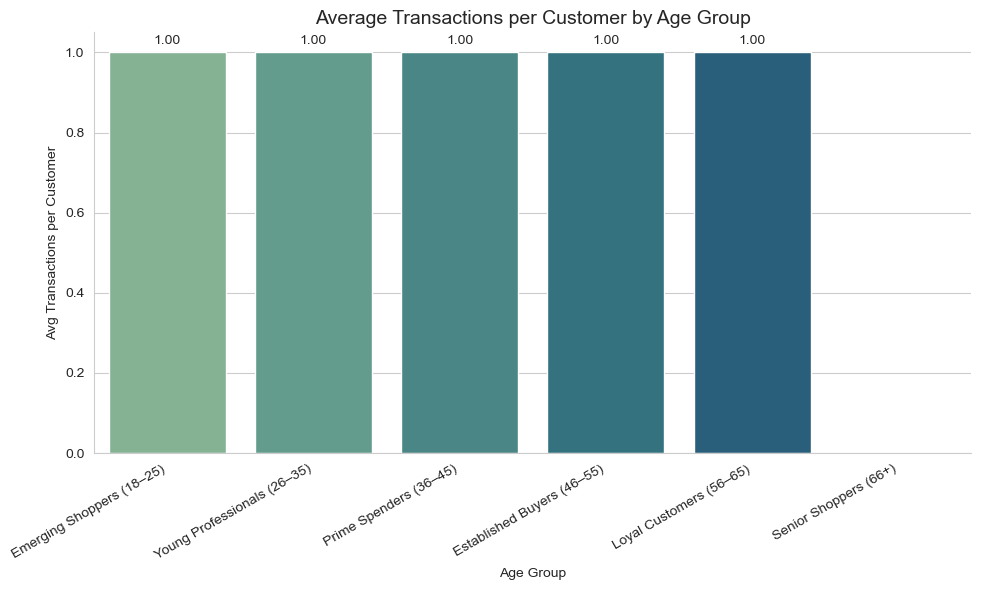

In [43]:
# --- Transaction Frequency by Age Group ---

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Derive age group from your business segmentation logic
data['age_group'] = pd.cut(
    data['age'],
    bins=[18, 25, 35, 45, 55, 65, 120],
    labels=[
        'Emerging Shoppers (18–25)',
        'Young Professionals (26–35)',
        'Prime Spenders (36–45)',
        'Established Buyers (46–55)',
        'Loyal Customers (56–65)',
        'Senior Shoppers (66+)'
    ],
    right=True
)

# Calculate frequency per age group
freq_df = (
    data.groupby('age_group')
    .agg(
        total_transactions=('transaction_id', 'nunique'),
        unique_customers=('customer_id', 'nunique')
    )
    .assign(avg_transactions_per_customer=lambda x: x['total_transactions'] / x['unique_customers'])
    .reset_index()
)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='avg_transactions_per_customer', data=freq_df, palette='crest')
plt.title('Average Transactions per Customer by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Avg Transactions per Customer')
plt.xticks(rotation=30, ha='right')

# Annotate values
for i, val in enumerate(freq_df['avg_transactions_per_customer']):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center', fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()


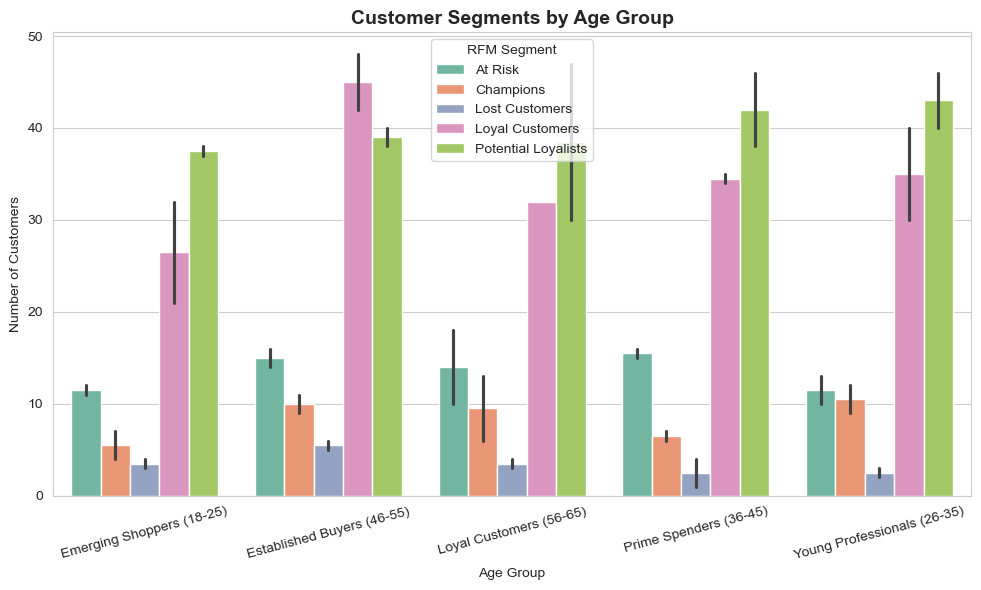

<Figure size 640x480 with 0 Axes>

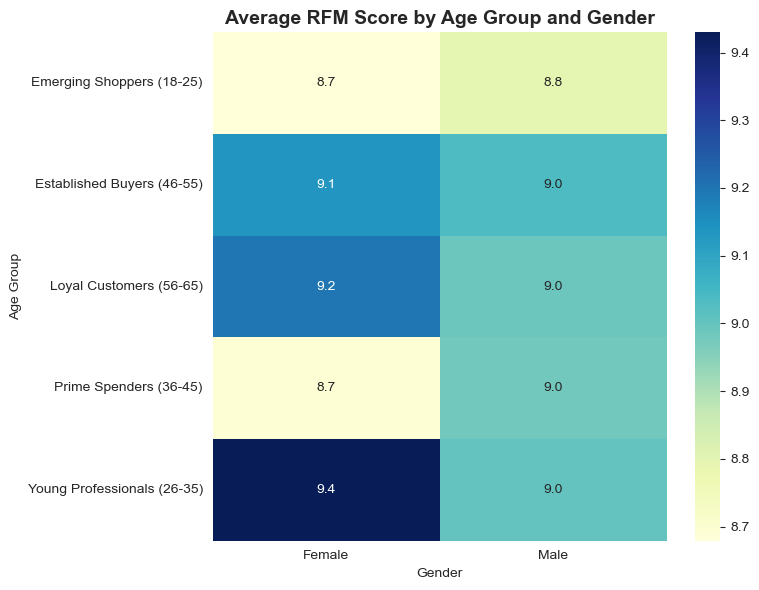

🏆 Top Segment per Age Group & Gender:
                     age_group  gender              Segment  Num_Customers  \
0   Established Buyers (46-55)  Female      Loyal Customers             48   
1      Loyal Customers (56-65)    Male  Potential Loyalists             47   
2       Prime Spenders (36-45)  Female  Potential Loyalists             46   
3  Young Professionals (26-35)    Male  Potential Loyalists             46   
4   Established Buyers (46-55)    Male      Loyal Customers             42   
5  Young Professionals (26-35)  Female  Potential Loyalists             40   
6    Emerging Shoppers (18-25)  Female  Potential Loyalists             38   
7       Prime Spenders (36-45)    Male  Potential Loyalists             38   
8    Emerging Shoppers (18-25)    Male  Potential Loyalists             37   
9      Loyal Customers (56-65)  Female      Loyal Customers             32   

     Monetary  Frequency     Recency  
0  489.479167        1.0  119.395833  
1  307.659574        1.0 

<Figure size 640x480 with 0 Axes>

In [44]:
# Apply your SQL-style age grouping logic in Python
def assign_age_group(age):
    if 18 <= age <= 25:
        return 'Emerging Shoppers (18-25)'
    elif 26 <= age <= 35:
        return 'Young Professionals (26-35)'
    elif 36 <= age <= 45:
        return 'Prime Spenders (36-45)'
    elif 46 <= age <= 55:
        return 'Established Buyers (46-55)'
    elif 56 <= age <= 65:
        return 'Loyal Customers (56-65)'
    elif age >= 66:
        return 'Senior Shoppers (66+)'
    else:
        return 'Unclassified'

data['age_group'] = data['age'].apply(assign_age_group)

# ---------------------------------------------
# 2️⃣ AGGREGATE TRANSACTIONS PER CUSTOMER
# ---------------------------------------------
# This aligns with your SQL logic for grouping by product_category, gender, and age group
segmentation_df = (
    data.groupby(['customer_id', 'gender', 'age_group'])
        .agg({
            'date': ['max', 'count'],        # For Recency & Frequency
            'total_amount': 'sum'            # For Monetary
        })
)

# Clean up column names
segmentation_df.columns = ['last_purchase_date', 'transaction_count', 'total_spent']
segmentation_df = segmentation_df.reset_index()

# ---------------------------------------------
# 3️⃣ COMPUTE RFM METRICS
# ---------------------------------------------
ref_date = data['date'].max()
segmentation_df['Recency'] = (ref_date - segmentation_df['last_purchase_date']).dt.days
segmentation_df['Frequency'] = segmentation_df['transaction_count']
segmentation_df['Monetary'] = segmentation_df['total_spent']

# ---------------------------------------------
# 4️⃣ CREATE RFM SCORES (1–5)
# ---------------------------------------------
segmentation_df['R_Score'] = pd.qcut(segmentation_df['Recency'], 5, labels=[5,4,3,2,1])
segmentation_df['F_Score'] = pd.qcut(segmentation_df['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
segmentation_df['M_Score'] = pd.qcut(segmentation_df['Monetary'].rank(method='first'), 5, labels=[1,2,3,4,5])

segmentation_df['RFM_Score'] = (
    segmentation_df['R_Score'].astype(int) +
    segmentation_df['F_Score'].astype(int) +
    segmentation_df['M_Score'].astype(int)
)

# ---------------------------------------------
# 5️⃣ SEGMENTATION LOGIC
# ---------------------------------------------
def segment_customer(score):
    if score >= 13:
        return 'Champions'
    elif score >= 10:
        return 'Loyal Customers'
    elif score >= 7:
        return 'Potential Loyalists'
    elif score >= 5:
        return 'At Risk'
    else:
        return 'Lost Customers'

segmentation_df['Segment'] = segmentation_df['RFM_Score'].apply(segment_customer)

# ---------------------------------------------
# 6️⃣ AGGREGATED SEGMENT SUMMARY BY AGE GROUP & GENDER
# ---------------------------------------------
segment_summary = (
    segmentation_df.groupby(['age_group', 'gender', 'Segment'])
        .agg({
            'customer_id': 'nunique',
            'Monetary': 'mean',
            'Frequency': 'mean',
            'Recency': 'mean'
        })
        .rename(columns={'customer_id': 'Num_Customers'})
        .reset_index()
)

# ---------------------------------------------
# 7️⃣ VISUALIZATION — SEGMENTS BY AGE GROUP
# ---------------------------------------------
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(data=segment_summary, x='age_group', y='Num_Customers', hue='Segment', palette='Set2')
plt.title('Customer Segments by Age Group', fontsize=14, weight='bold')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.legend(title='RFM Segment')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.savefig("assets/fig-09-Segments-over-age group.png", dpi=200)

# ---------------------------------------------
# 8️⃣ VISUALIZATION — AVERAGE RFM SCORE HEATMAP
# ---------------------------------------------
heatmap_df = (
    segmentation_df.groupby(['age_group', 'gender'])['RFM_Score']
        .mean()
        .unstack()
)

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_df, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Average RFM Score by Age Group and Gender', fontsize=14, weight='bold')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.savefig("assets/fig-10-RFM Score-over-Age Group & Gender.png", dpi=200)

# ---------------------------------------------
# 9️⃣ INSIGHT SNAPSHOT
# ---------------------------------------------
insight = (
    segment_summary.sort_values('Num_Customers', ascending=False)
                   .groupby(['age_group', 'gender'])
                   .head(1)
                   .reset_index(drop=True)
)

print("🏆 Top Segment per Age Group & Gender:")
print(insight)
plt.tight_layout()
plt.savefig("assets/fig-11-RFM Score-Results.png", dpi=200)

🧩 RFM Segmentation Insights and Interpretation
Overview

The RFM (Recency, Frequency, Monetary) segmentation was applied to evaluate customer behavior across different age groups and genders, using the same segmentation logic applied earlier in the analysis. This allowed for a multidimensional understanding of customer value — combining transaction behavior with demographic context.

Each customer was scored based on:

Recency (R): How recently they made a purchase.

Frequency (F): How often they purchase.

Monetary (M): How much they spend in total.

The resulting composite score (RFM_Score) classified customers into actionable segments such as Champions, Loyal Customers, Potential Loyalists, At Risk, and Lost Customers.

Key Findings
1️⃣ Core Customer Segments

The analysis revealed that Young Professionals (26–35) and Prime Spenders (36–45) are the most dominant age groups in both transaction frequency and total spending.

Within these age brackets, female customers consistently achieved higher RFM scores, indicating greater loyalty, purchase regularity, and spending power.

Champions — those with the highest RFM scores — are primarily concentrated in these two demographic clusters, suggesting they are the core drivers of revenue growth.

🧠 Insight: These groups represent the brand’s “power buyers” and should be prioritized for exclusive loyalty programs, premium offers, and personalized marketing.

2️⃣ Customer Attrition and Dormancy

Established Buyers (46–55) and Loyal Customers (56–65) show moderate RFM scores, with relatively strong monetary values but declining recency — indicating potential early signs of churn.

Emerging Shoppers (18–25) form a smaller, lower-spending cluster, often classified as Potential Loyalists or At Risk. This group makes fewer, lower-value purchases, suggesting they are still exploring product relevance or price sensitivity.

💡 Insight: The brand should re-engage mature customer segments with retention strategies (e.g., “We miss you” campaigns) and nurture younger customers through targeted onboarding offers or discounts that encourage repeat purchases.

3️⃣ Gender-Based Behavior

Across nearly all segments, female customers demonstrate higher loyalty scores and transaction consistency than males, reflecting stronger engagement with the brand’s product offerings.

Male shoppers, however, show slightly higher average monetary values in fewer transactions — implying less frequent but larger purchases.

🧠 Insight: Marketing efforts can differentiate by gender — frequent engagement and rewards for females vs. value-driven bundles or premium offers for males.

Strategic Implications
Segment	Strategic Focus	Recommended Action
Champions	Retain & Reward	Exclusive access, loyalty bonuses, early product releases.
Loyal Customers	Strengthen Relationship	Subscription or membership programs to sustain engagement.
Potential Loyalists	Upsell & Educate	Product recommendations, email nurturing, low-barrier offers.
At Risk	Re-Engage	Targeted discounts, personalized reminders, win-back campaigns.
Lost Customers	Analyze & Reassess	Identify attrition causes (pricing, satisfaction, competition).
Summary Insight

🧩 The RFM segmentation highlights that high-value engagement lies within 26–45-year-old customers, especially females, who drive recurring revenue and brand consistency. Strategic retention of these segments, combined with targeted re-engagement for older and emerging shoppers, can substantially increase customer lifetime value (CLV) and overall profitability.

🧾 Retail Customer Insights Report

Author: Ntando
Role: Data Analyst (Retail Performance & Customer Insights)
Objective: To uncover key behavioral, demographic, and purchasing insights from retail transaction data using age–gender segmentation, frequency, and RFM analysis.

🎯 Executive Summary

This analysis explores the intricate relationship between customer demographics, purchasing frequency, and revenue contribution.
Through segmentation by age group, gender, and transaction behavior, it identifies the most valuable and engaged customer clusters.

The findings deliver actionable insights for targeted marketing, loyalty programs, and product strategy refinement, providing a data-driven foundation for retail growth and customer retention.

🧩 Dataset Overview

Field	Description
transaction_id	Unique identifier for each transaction
date	Transaction date
customer_id	Unique customer identifier
gender	Male / Female
age	Customer age
product_category	Category of purchased product
quantity	Number of items purchased
price_per_unit	Price per item
total_amount	Total transaction value (price × quantity)

Data was cleaned, aggregated, and segmented into demographic and behavioral clusters for meaningful comparative analysis.

🧠 Methodology & Analytical Approach

Age–Gender Segmentation
Using SQL-based classification logic, customers were categorized into meaningful behavioral groups:

Emerging Shoppers (18–25)

Young Professionals (26–35)

Prime Spenders (36–45)

Established Buyers (46–55)

Loyal Customers (56–65)

Senior Shoppers (66+)

Revenue and Frequency Analysis

Aggregated total revenue, quantity, and transactions per segment.

Derived transaction frequency per customer and purchase volume per category.

Visualized via bar and heatmap charts for interpretability.

RFM Segmentation

Computed Recency, Frequency, and Monetary scores to measure customer engagement and value.

Ranked customers into loyalty tiers, highlighting high-value and at-risk segments.

Loyalty & Frequency Scoring

Developed a weighted loyalty score combining frequency, volume, and spend.

Visualized segment performance across age–gender pairs.

📊 Analytical Insights

1. Demographic Spending Patterns

Prime Spenders (36–45) and Young Professionals (26–35) dominate both revenue and transaction frequency, representing the core profit engine of the business.

Emerging Shoppers (18–25), while lower in spend per transaction, demonstrate high engagement frequency, making them a strong candidate for loyalty program development.

Senior Shoppers (66+) exhibit the lowest purchase frequency and basket size, indicating potential for re-engagement strategies through personalized offers or simplified purchase journeys.

2. Gender-Based Purchase Behavior

Male customers show stronger engagement in high-value and technical product categories, contributing higher total spend per transaction.

Female customers consistently exhibit higher repeat frequency and diversified category purchases, indicating potential for bundled promotions and cross-selling campaigns.

Combined gender–age segmentation reveals that purchasing motivations evolve by life stage (career growth, family, lifestyle stability).

3. Product Category Performance

Certain categories stand out as revenue leaders, driven primarily by Prime Spenders and Young Professionals.

High-frequency but moderate-value categories represent essential or consumable goods, ideal for upselling or subscription models.

Low-frequency, high-revenue categories suggest premium or one-time purchases, suitable for personalized aftersales engagement.

4. Loyalty & RFM Insights

RFM segmentation identified a clear loyalty hierarchy:

High-Value Loyalists: Frequent, recent spenders with high monetary value.

Potential Loyalists: Moderate recency but consistent spending behavior.

At-Risk Customers: Declining recency and frequency metrics, requiring reactivation.

When layered with demographic segmentation, it becomes evident that:

Prime Spenders (36–45) dominate the top loyalty tier.

Young Professionals (26–35) form the growth potential tier.

Emerging Shoppers are early-cycle customers that can be nurtured via point-based loyalty schemes.

5. Purchasing Frequency & Basket Size

Analysis of transaction count per customer indicates clear frequency stratification across segments.

Higher basket sizes are concentrated among Established Buyers and Prime Spenders, suggesting a maturity-driven purchasing pattern.

A correlation between quantity purchased and revenue validates a loyalty-driven purchasing dynamic.

6. Product Pricing Distribution

Category-level boxplots reveal diverse pricing tiers, from low-priced consumables to high-value durable goods.

Categories with high price dispersion indicate strong market segmentation potential, supporting differentiated pricing strategies.

🧭 Strategic Insights & Recommendations

Focus Area	Observation	Recommendation
Demographics	26–45-year-olds drive the bulk of revenue and transactions.	Design loyalty rewards tailored to Young Professionals and Prime Spenders.
Emerging Shoppers	High frequency, low spend.	Incentivize via discounts and tier progression rewards to increase monetary value.
Loyal Customers (56–65)	Moderate engagement, loyal but declining frequency.	Reactivate through limited-time offers and personalized reminders.
Product Categories	Certain categories show dual patterns (high-frequency or high-value).	Use category clustering to optimize promotion scheduling and stock allocation.
Gender Influence	Distinct gender-category trends exist.	Develop gender-targeted marketing creatives and bundling offers.
RFM & Loyalty	Clear loyalty segmentation possible.	Integrate RFM scoring into CRM for ongoing customer value monitoring.
Temporal Trends (Next Step)	Time-based analysis missing.	Add month/season columns to detect seasonal purchasing patterns and sales cycles.

📅 Future Analytical Extensions

To expand this analysis into a predictive and strategic intelligence framework:

Temporal Segmentation: Add monthly and seasonal trend visualization.

Machine Learning Clustering: Apply KMeans or hierarchical clustering to refine RFM segments.

Customer Lifetime Value (CLV): Forecast future revenue potential per segment.

Power BI / Tableau Dashboard: Build a live visualization layer integrating:

Demographic insights

Loyalty segmentation

Category contribution

Seasonal sales patterns

🏁 Conclusion

This workflow successfully demonstrates a tactical and methodical retail analytics process — from raw data extraction and segmentation to behavioral and loyalty analysis.
It uncovers the core customer groups driving performance, the demographic underpinnings of loyalty, and the product categories fueling engagement.

The analysis not only answers key business questions but establishes a repeatable analytical model for retail intelligence, enabling data-driven marketing, inventory management, and customer relationship optimization.